In [52]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
df_train = pd.read_csv("train.csv", parse_dates=["drug_approved_by_UIC"])
df_test = pd.read_csv("test.csv", parse_dates=["drug_approved_by_UIC"])

In [3]:
df_train.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,8.022969
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,7.858458
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,6.341969
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,6.590176
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,2015-11-28,43,6.144782


In [4]:
df_test.head()

,patient_id,name_of_drug,review_by_patient,drug_approved_by_UIC,number_of_times_prescribed,use_case_for_drug,effectiveness_rating
0,163740,Mirtazapine,"""I&#039;ve tried a few antidepressants over th...",2012-02-28,22,Depression,10
1,39293,Contrave,"""Contrave combines drugs that were used for al...",2017-03-05,35,Weight Loss,9
2,208087,Zyclara,"""4 days in on first 2 weeks. Using on arms an...",2014-07-03,13,Keratosis,4
3,23295,Methadone,"""Ive been on Methadone for over ten years and ...",2016-10-18,21,Opiate Withdrawal,7
4,97013,Ambien,"""Ditto on rebound sleepless when discontinued....",2015-01-13,44,Insomnia,2


In [ ]:
df_train.base_score.round().count().sort_index().plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.xlabel("", fontsize = 20)
plt.ylabel("", fontsize = 20)
plt.title("Top20 : The number of drugs per condition.", fontsize = 20)

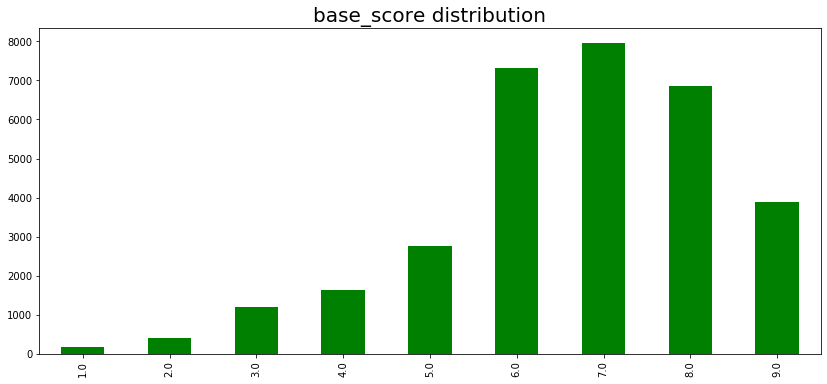

In [24]:
a = df_train.base_score.round().value_counts(sort = False).sort_index()
a.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.title("base_score distribution", fontsize = 20)
plt.show()

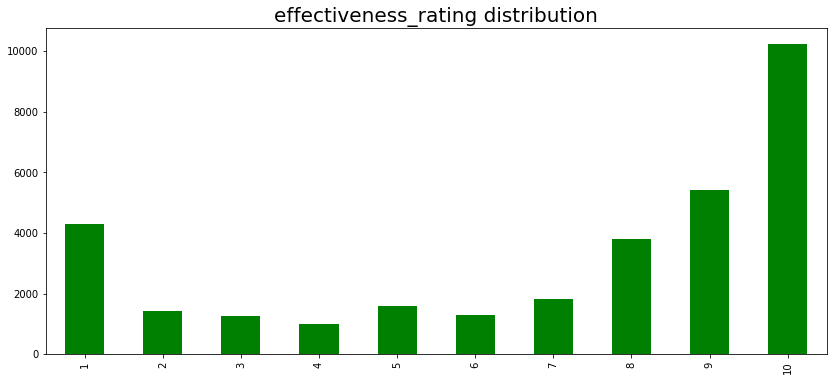

In [23]:
a = df_train.effectiveness_rating.value_counts(sort = False).sort_index()
a.plot(kind="bar", figsize = (14,6), fontsize = 10,color="green")
plt.title("effectiveness_rating distribution", fontsize = 20)
plt.show()

In [28]:
df_train.effectiveness_rating.corr(df_train.base_score)

0.41230129263718757

This implies that these two columns are not related with each other

# Preprocessing

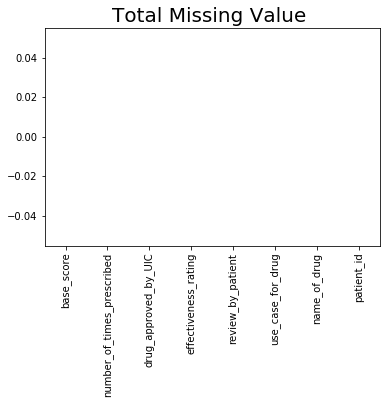

In [31]:
percent = (df_train.isnull().sum()).sort_values(ascending=False)
percent.plot(kind="bar", fontsize = 10, color='green')

plt.title("Total Missing Value ", fontsize = 20)
plt.show()

In [38]:
#from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

import re

In [41]:
stops = set(stopwords.words('english'))
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [43]:
not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't","mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)

In [39]:
stemmer = SnowballStemmer('english')

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

In [44]:
%time df_train['review_clean'] = df_train['review_by_patient'].apply(review_to_words)

Wall time: 23.8 s


In [45]:
%time df_test['review_clean'] = df_test['review_by_patient'].apply(review_to_words)

Wall time: 8.02 s


In [47]:
df_train.head()

,patient_id,name_of_drug,use_case_for_drug,review_by_patient,effectiveness_rating,drug_approved_by_UIC,number_of_times_prescribed,base_score,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,2012-05-20,27,8.022969,no side effect take combin bystol mg fish oil
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,2010-04-27,192,7.858458,son halfway fourth week intuniv becam concern ...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,2009-12-14,17,6.341969,use take anoth oral contracept pill cycl happi...
3,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,2016-11-27,37,6.590176,suboxon complet turn life around feel healthie...
4,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,2015-11-28,43,6.144782,nd day mg start work rock hard erect howev exp...


In [70]:
# https://github.com/corazzon/KaggleStruggle/blob/master/word2vec-nlp-tutorial/tutorial-part-1.ipynb
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

vectorizer = CountVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = None, 
                             min_df = 2, # 토큰이 나타날 최소 문서 개수
                             ngram_range=(4, 4),
                             max_features = 10000
                            )
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=2,
                ngram_range=(4, 4), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [71]:
#https://stackoverflow.com/questions/28160335/plot-a-document-tfidf-2d-graph
pipeline = Pipeline([
    ('vect', vectorizer),
])

In [72]:
%time train_data_features = pipeline.fit_transform(df_train['review_clean'])
%time test_data_features = pipeline.fit_transform(df_test['review_clean'])

Wall time: 11.6 s
Wall time: 2.39 s


In [74]:
test_data_features.shape[1]

10000

In [53]:
y_train = df_train.base_score
y_train

0        8.022969
1        7.858458
2        6.341969
3        6.590176
4        6.144782
5        5.691792
6        8.563274
7        7.301039
8        6.633970
9        6.562116
10       8.358951
11       7.927926
12       6.941455
13       7.828315
14       7.451867
15       5.850894
16       8.587807
17       6.276201
18       7.940428
19       5.241428
20       7.282127
21       6.290835
22       8.616149
23       7.323018
24       8.648337
25       7.715256
26       7.921907
27       6.590176
28       6.124057
29       6.361917
           ...   
32135    6.573013
32136    7.208318
32137    4.989932
32138    8.482883
32139    4.228096
32140    7.828315
32141    6.228093
32142    8.469380
32143    7.759807
32144    8.743005
32145    6.386023
32146    8.311305
32147    6.511434
32148    7.579306
32149    8.074493
32150    6.735530
32151    6.935684
32152    7.147724
32153    8.094009
32154    8.593894
32155    4.619382
32156    6.109307
32157    7.129247
32158    8.567052
32159    8

# Neural network training

In [129]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Bidirectional, LSTM, BatchNormalization, Dropout, Activation
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import RootMeanSquaredError

In [122]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

In [130]:
#Source code in keras 김태영'blog

# 2. Model Structure
model = Sequential()

model.add(Dense(200, input_shape=(train_data_features.shape[1],)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(300))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100, activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='linear'))

# 3. Model compile
model.compile(optimizer='rmsprop', loss=root_mean_squared_error, metrics= [RootMeanSquaredError()])

In [131]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 200)               2000200   
_________________________________________________________________
batch_normalization_17 (Batc (None, 200)               800       
_________________________________________________________________
activation_17 (Activation)   (None, 200)               0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 300)               60300     
_________________________________________________________________
batch_normalization_18 (Batc (None, 300)               1200      
_________________________________________________________________
activation_18 (Activation)   (None, 300)              

In [132]:
# 4. Train model
hist = model.fit(train_data_features.toarray(), y_train, epochs=10, batch_size=64)

Train on 32165 samples
Epoch 1/10
32165/32165 [==============================] - 44s 1ms/sample - loss: 1.6330 - root_mean_squared_error: 2.1098
Epoch 2/10
32165/32165 [==============================] - 37s 1ms/sample - loss: 1.4100 - root_mean_squared_error: 1.8034
Epoch 3/10
32165/32165 [==============================] - 41s 1ms/sample - loss: 1.3376 - root_mean_squared_error: 1.7161
Epoch 4/10
32165/32165 [==============================] - 46s 1ms/sample - loss: 1.2918 - root_mean_squared_error: 1.6614
Epoch 5/10
32165/32165 [==============================] - 49s 2ms/sample - loss: 1.2562 - root_mean_squared_error: 1.6229
Epoch 6/10
32165/32165 [==============================] - 42s 1ms/sample - loss: 1.2316 - root_mean_squared_error: 1.5982
Epoch 7/10
32165/32165 [==============================] - 73s 2ms/sample - loss: 1.1844 - root_mean_squared_error: 1.55257s - 
Epoch 10/10
32165/32165 [==============================] - 84s 3ms/sample - loss: 1.1752 - root_mean_squared_error: 1.

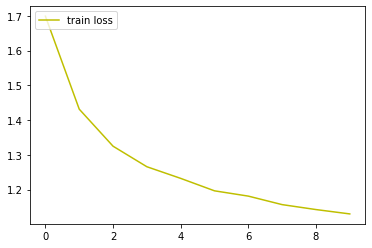

In [89]:
fig, loss_ax = plt.subplots()

#acc_ax = loss_ax.twinx()

#loss_ax.set_ylim([0.0, 1.0])
#acc_ax.set_ylim([0.0, 1.0])

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
acc_ax.plot(hist.history['mean_absolute_error'], 'b', label='train acc')

#loss_ax.set_xlabel('epoch')
#loss_ax.set_ylabel('loss')
#acc_ax.set_ylabel('mean_absolute_error')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

# 6. Evaluation
#loss_and_metrics = model.evaluate(test_data_features, y_test, batch_size=32)
#print('loss_and_metrics : ' + str(loss_and_metrics))

In [133]:
sub_preds_deep = model.predict(test_data_features.toarray(),batch_size=32)

In [134]:
sub_preds_deep = np.around(sub_preds_deep, decimals=2)

In [135]:
df = pd.DataFrame(data=sub_preds_deep, columns = ['base_score'])
df.head()

,base_score
0,5.42
1,5.91
2,5.96
3,5.96
4,5.96


In [136]:
result = pd.concat([df_test.patient_id, df], axis=1, sort=False)
result.head()

,patient_id,base_score
0,163740,5.42
1,39293,5.91
2,208087,5.96
3,23295,5.96
4,97013,5.96


In [137]:
result.to_csv('sub_1.csv', index=False)

In [140]:
sub_preds_deep.mean()

5.646273